## Transformer Architecture

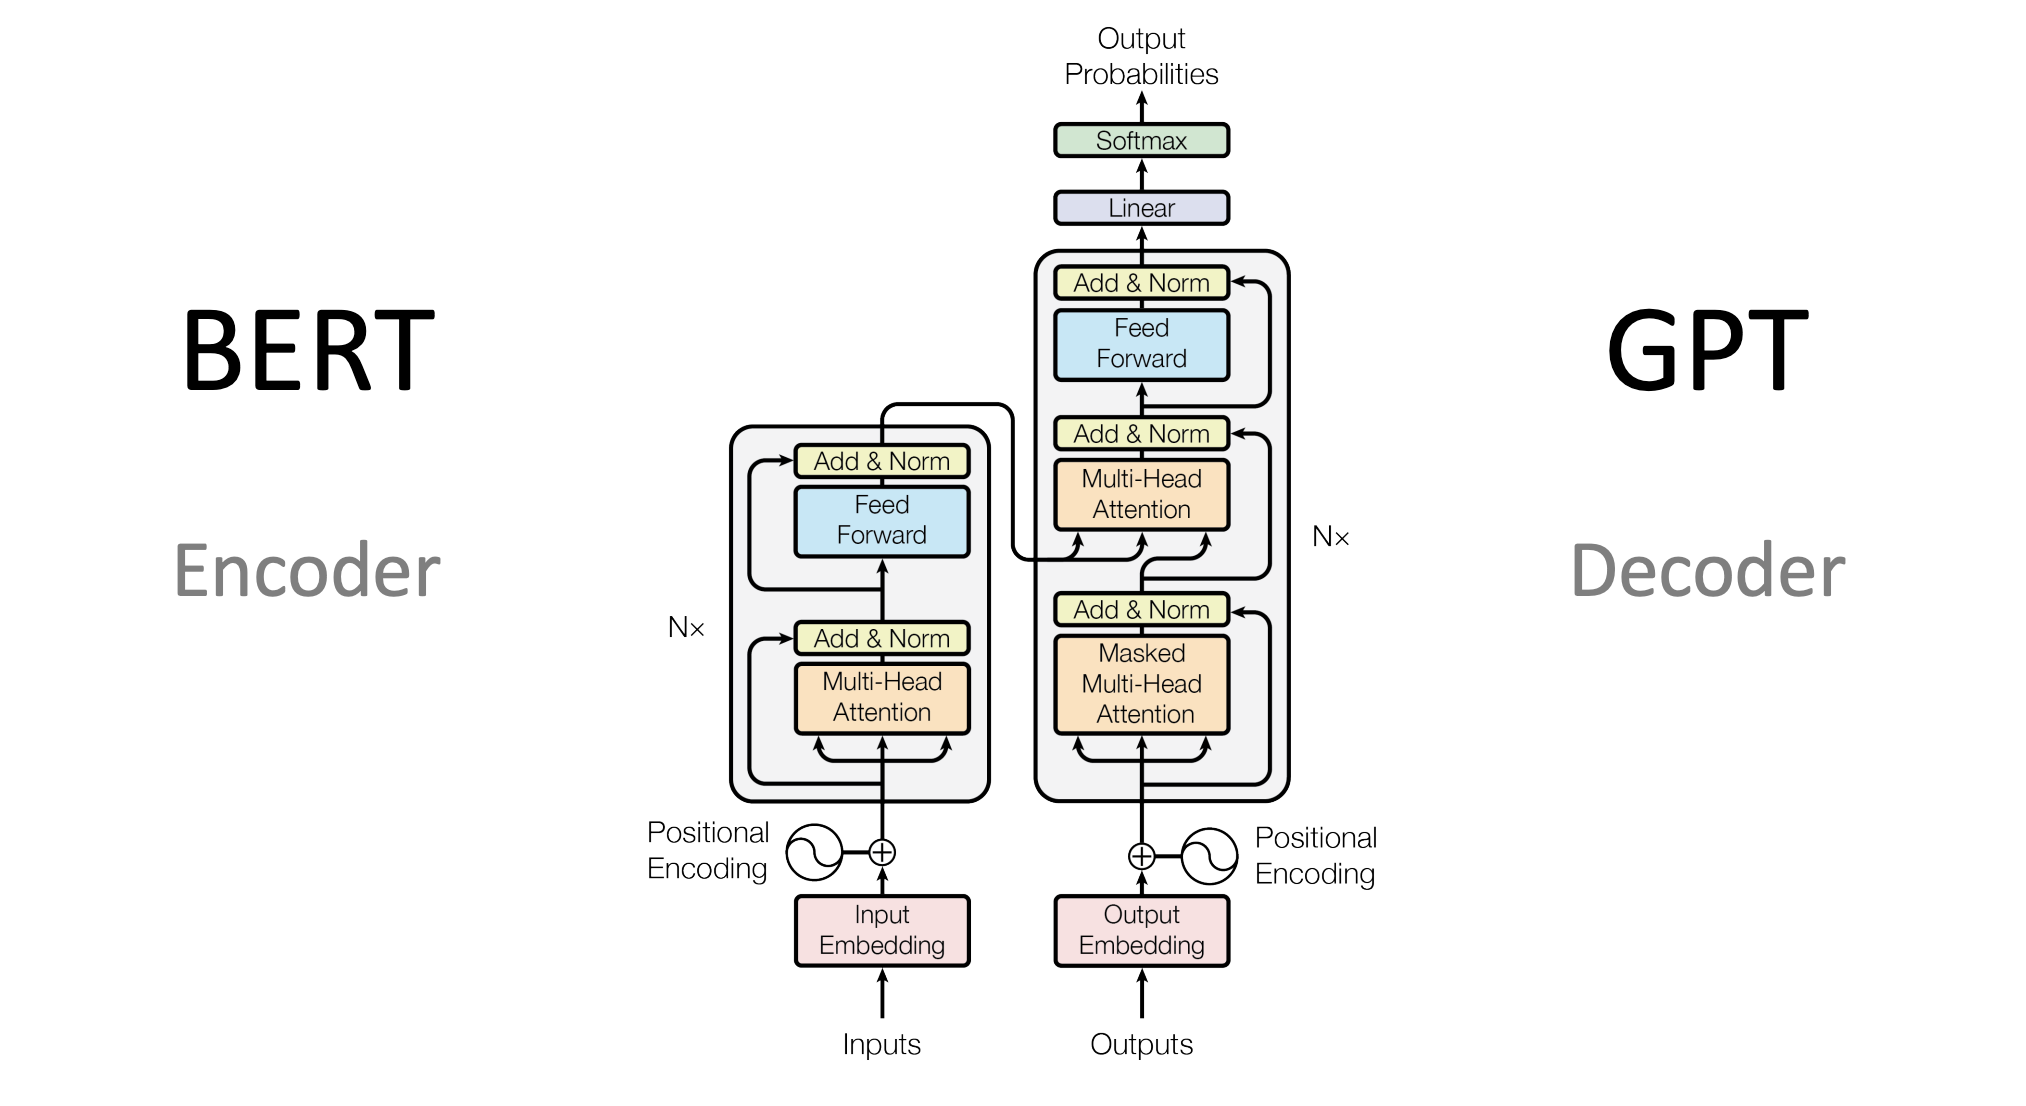

In [57]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import gzip 
import time 
import math 
import spacy 

from torch.utils.data import Dataset, dataloader
from torch.nn.utils.rnn import pad_sequence 
from tqdm import tqdm

In [58]:
# python -m spacy download de_core_news_sm 
# python -m spacy download en_core_web_sm 

In [59]:
## Loading the French and English Dataset
spacy_de = spacy.load('de_core_news_sm') # French
spacy_en = spacy.load('en_core_web_sm') # English

In [60]:
SEED=123 # To fix the random values
torch.manual_seed(SEED)
#torch.backends.cudnn.deterministic = True

In [61]:
#To load the dataset
class Multi30kDataset(Dataset):
    def __init__(self,src_file, trg_file, src_transform=None, trg_transform=None):
        self.src_data=self.load_data(src_file)
        self.trg_data=self.load_data(trg_file)
        self.src_transform=src_transform
        self.trg_transform=trg_transform
    
    def load_data(self, file_path):
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            data = f.readlines()
        return data
    
    def __len__(self):
        return len(self.src_data)
    
    def __getitem__(self, idx):
        src_sentence = self.src_data[idx].strip()
        trg_sentence = self.trg_data[idx].strip()
        
        if self.src_transform:
            src_sentence = self.src_transform(src_sentence)
        if self.trg_transform:
            trg_sentence = self.trg_transform(trg_sentence)
        
        return {"src": src_sentence, "trg": trg_sentence}

In [62]:
def tokenize_decoder(text):
    return [token.text.lower() for token in spacy_de.tokenizer(text)]

In [63]:
def tokenize_encoder(text):
    return [token.text.lower() for token in spacy_en.tokenizer(text)]

In [64]:
## Defining Training and Testing path
training_encoder_path = "../datasets/train.en.gz"
training_decoder_path = "../datasets/train.de.gz"
validation_encoder_path= "../datasets/val.en.gz"
validation_decoder_path = "../datasets/val.de.gz"
testing_encoder_path = "../datasets/test_2016_flickr.en.gz"
testing_decoder_path = "../datasets/test_2016_flickr.de.gz"

In [65]:
## Loading the Dataset
train_data = Multi30kDataset(training_decoder_path, training_encoder_path, src_transform=tokenize_decoder, trg_transform=tokenize_encoder)
val_data = Multi30kDataset(validation_decoder_path, validation_encoder_path, src_transform=tokenize_decoder, trg_transform=tokenize_encoder)
test_data = Multi30kDataset(testing_decoder_path, testing_encoder_path, src_transform=tokenize_decoder, trg_transform=tokenize_encoder)
     
# Define special tokens
PAD_TOKEN = '<pad>'
SOS_TOKEN = '<sos>'
EOS_TOKEN = '<eos>'
UNK_TOKEN = '<unk>'

In [66]:
class CreateVocabulary(nn.Module):
    def __init__(self, tokenize_sentence, special_token):
        vocabulary =  {token : idx for idx, token in enumerate(special_token)}
        for sentence in tokenize_sentence:
            for token in sentence:
                if token not in vocabulary:
                    vocabulary[token] = len(token)
        return vocabulary

In [67]:
## Tokenize all sentence 
train_decoder_tokenizer =  [tokenize_decoder(sentence.strip()) for sentence in train_data.src_data]
test_decoder_tokenizer =  [tokenize_encoder(sentence.strip()) for sentence in train_data.trg_data]

In [68]:
## Creating Vocabulary


In [69]:
class PositionalEncoding(nn.Module):
    def __init__(self):
        pass

In [70]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        pass

In [71]:
class PositionWiseFeedForwardNetwwork(nn.Module):
    def __init__(self):
        pass

In [72]:
class MaskedMultiHeadAttention(nn.Module):
    def __init__(self):
        pass

In [73]:
class EncoderLayer(nn.Module):
    def __init__(self):
        pass

In [74]:
class DecoderLayer(nn.Module):
    def __init__(self):
        pass

In [75]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, trg_vocab_size, d_model, num_has, num_layers, d_ff, max_seq_length, dropout):
        super().__init__()
        pass

In [76]:
# class Transformer(nn.Module):
#     def __init__(self,src_vocab_size, trg_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
#         super().__init__()
#         self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
#         self.decoder_embedding = nn.Embedding(trg_vocab_size, d_model)
        
#         self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
#         self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        
#         self.fc_out = nn.Linear(d_model, trg_vocab_size)
#         self.dropout = nn.Dropout(dropout)
        
#         self.scale = torch.sqrt(torch.FloatTensor([d_model]))
        
#     def generate_mask(self,src,trg):
#         pass

#     def forward(self,src,trg):
#         pass
        
        
        
        